### Importing required libraries and reading CSV

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dr = pd.read_csv('cleaned_practo_doctors.csv')
dr.sample(5)

,dr_name,speciality,qualification,years_of_experience,location,city,dp_score%,npv,consultation_fee_₹,additional_qualification
3510,Dr. Uma Mallaiah,Ophthalmologist,MBBS,28.0,Greater Kailash Part 2,Delhi,50.0,1.0,1500.0,DO
4120,Dr. Reshma Shah,Dentist,BDS,24.0,Mumbai,Mumbai,99.0,73.0,500.0,Not Applicable
975,Dr. Anjana Hulse,Pediatrician,MBBS,20.0,Bannerghatta Road,Bangalore,99.0,102.0,850.0,Member of the Royal College of Paediatrics and...
4994,Dr. Rajiv Anand,Psychiatrist,MBBS,46.0,Andheri West,Mumbai,93.0,247.0,2000.0,M.D. (Psychiatry)
3086,Dr. Vinod Sukhijha,Orthopedist,MBBS,47.0,Sarita Vihar,Delhi,100.0,1.0,1500.0,MS


### Dropping unnecessary columns

In [3]:
dr.drop('dr_name', axis='columns',inplace=True)

In [4]:
dr.drop('additional_qualification', axis='columns',inplace=True)

In [5]:
dr

,speciality,qualification,years_of_experience,location,city,dp_score%,npv,consultation_fee_₹
0,Dentist,BDS,26.0,Basavanagudi,Bangalore,97.0,119.0,450.0
1,Dentist,BDS,32.0,Domlur,Bangalore,93.0,16.0,300.0
2,Dentist,BDS,22.0,Jayanagar 9 Block,Bangalore,97.0,96.0,650.0
3,Dentist,BDS,21.0,Jayanagar 9 Block,Bangalore,98.0,153.0,650.0
4,Dentist,BDS,13.0,Banaswadi,Bangalore,100.0,81.0,400.0
...,...,...,...,...,...,...,...,...
5154,Rheumatologist,MBBS,17.0,Mumbai,Mumbai,0.0,0.0,500.0
5155,Rheumatologist,MBBS,40.0,Mumbai,Mumbai,91.0,6.0,2500.0
5156,Rheumatologist,Others,7.0,Mumbai,Mumbai,0.0,0.0,1500.0
5157,Chiropractor,Others,20.0,Mumbai,Mumbai,100.0,302.0,3000.0


### EDA

<AxesSubplot:xlabel='city', ylabel='count'>

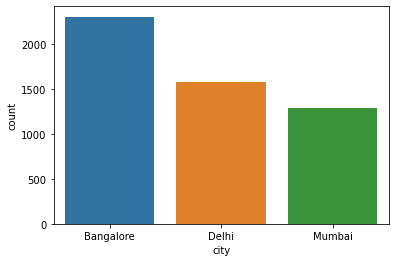

In [6]:
sns.countplot(x=dr['city'])

<AxesSubplot:xlabel='city'>

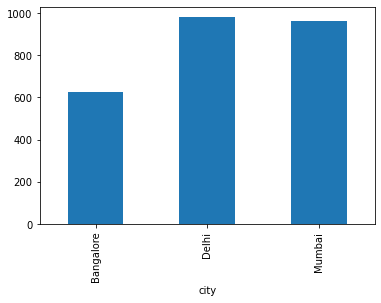

In [7]:
dr['consultation_fee_₹'].groupby(dr['city']).mean().plot(kind='bar')

<AxesSubplot:xlabel='count', ylabel='speciality'>

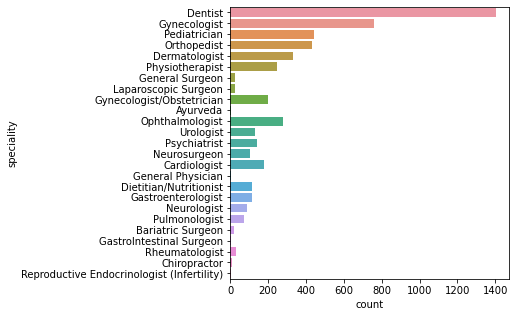

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(y = dr['speciality'])

<AxesSubplot:xlabel='speciality'>

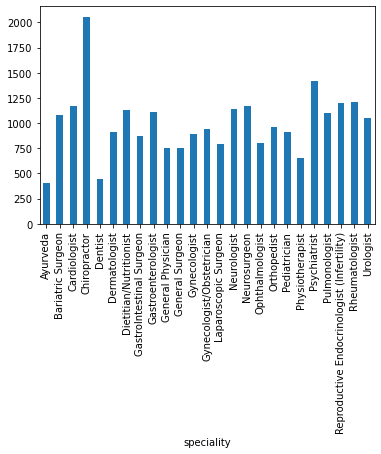

In [9]:
dr['consultation_fee_₹'].groupby(dr['speciality']).mean().plot(kind='bar')

In [10]:
dr.describe()

,years_of_experience,dp_score%,npv,consultation_fee_₹
count,5159.000000,5159.000000,5159.000000,5159.000000
mean,19.405311,85.489436,61.893196,819.520450
std,10.159293,28.857988,132.793529,478.027358
min,0.000000,0.000000,0.000000,0.000000
25%,12.000000,90.000000,3.000000,500.000000
50%,17.000000,97.000000,17.000000,700.000000
75%,25.000000,100.000000,65.000000,1000.000000
max,64.000000,100.000000,3223.000000,5000.000000


In [11]:
dr.corr()['consultation_fee_₹']

years_of_experience    0.344676
dp_score%             -0.037738
npv                   -0.038861
consultation_fee_₹     1.000000
Name: consultation_fee_₹, dtype: float64

<AxesSubplot:>

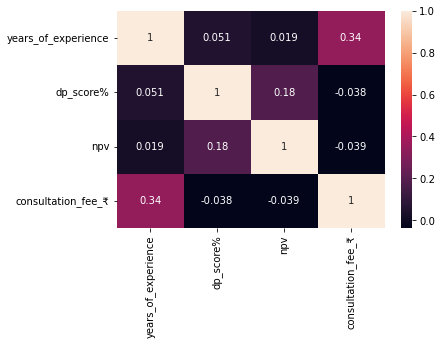

In [12]:
sns.heatmap(dr.corr(), annot=True)

<AxesSubplot:xlabel='consultation_fee_₹', ylabel='Density'>

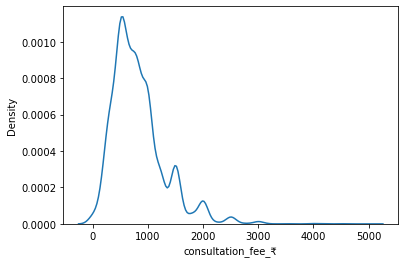

In [13]:
sns.kdeplot(dr['consultation_fee_₹'])

<AxesSubplot:xlabel='years_of_experience', ylabel='Density'>

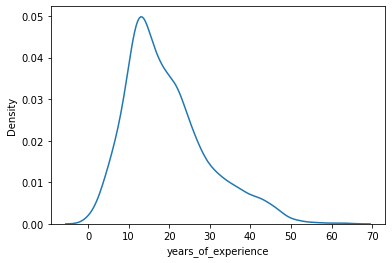

In [14]:
sns.kdeplot(dr['years_of_experience'])

<AxesSubplot:xlabel='consultation_fee_₹'>

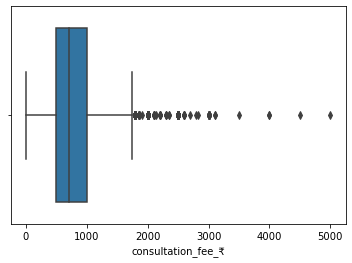

In [15]:
sns.boxplot(x = dr['consultation_fee_₹'])

In [16]:
dr[dr['consultation_fee_₹']>1500]

,speciality,qualification,years_of_experience,location,city,dp_score%,npv,consultation_fee_₹
1176,Pediatrician,MBBS,24.0,Richmond Town,Bangalore,100.0,0.0,1600.0
1910,Psychiatrist,MBBS,44.0,Hebbal,Bangalore,91.0,12.0,2130.0
1911,Psychiatrist,MBBS,28.0,Whitefield,Bangalore,85.0,8.0,1700.0
1928,Psychiatrist,MBBS,27.0,Hebbal,Bangalore,85.0,91.0,2830.0
1935,Psychiatrist,MBBS,22.0,Richmond Town,Bangalore,99.0,81.0,1600.0
...,...,...,...,...,...,...,...,...
5139,Pulmonologist,MBBS,14.0,Mahim,Mumbai,100.0,10.0,1800.0
5147,Rheumatologist,MBBS,29.0,Parel,Mumbai,100.0,0.0,2100.0
5152,Rheumatologist,MBBS,12.0,Mumbai,Mumbai,90.0,13.0,2000.0
5155,Rheumatologist,MBBS,40.0,Mumbai,Mumbai,91.0,6.0,2500.0


<AxesSubplot:xlabel='years_of_experience'>

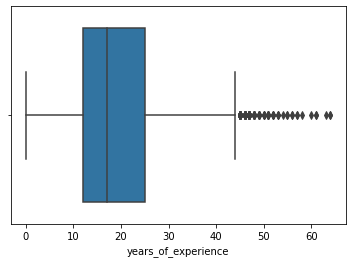

In [17]:
sns.boxplot(x = dr['years_of_experience'])

### Building the model

- **Extracting the independent and dependent variables**

In [18]:
X = dr.drop(columns=['consultation_fee_₹'])
Y = dr['consultation_fee_₹']

- **Train Test split**

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=401)

- **Importing sklearn**

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

- **Applying OHE and applying column transformer**

In [21]:
ohe=OneHotEncoder()
ohe.fit(X[['speciality','qualification','location','city']])

OneHotEncoder()

In [22]:
col_transform=make_column_transformer((OneHotEncoder(categories=ohe.categories_, drop ='first' ),['speciality','qualification','location','city']),
                                    remainder='passthrough')

- **Implementing Linear Reg Model and making pipeline**

In [23]:
lr=LinearRegression()

In [24]:
pipe=make_pipeline(col_transform,lr)

In [25]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ayurveda', 'Bariatric Surgeon', 'Cardiologist', 'Chiropractor',
       'Dentist', 'Dermatologist', 'Dietitian/Nutritionist',
       'GastroIntestinal Surgeon', 'Gastroenterologist',
       'General Physician', 'General Surgeon', 'Gynecologist...
       'Wadala', 'Walkeshwar', 'West Of Chord Road',
       'Wheelers Road (Cooke Town)', 'Whitefield', 'Wilson Garden',
       'Worli', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'Zakir Nagar'], dtype=object),
                                                                            array(['Bangalore', 'Delhi', 'Mumbai'], dtype=object)],
                                                                drop='first'),
                                   

- **Predicting and Evaluating Model Performance**

In [26]:
Y_pred=pipe.predict(X_test)

In [27]:
print('R2 score:',r2_score(Y_test,Y_pred))
print('MAE:',mean_absolute_error(Y_test,Y_pred))

R2 score: 0.6680277900375959
MAE: 180.8207781719015


In [28]:
# rs=[]
# for i in range(1000):
#     X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=i)
#     lr=LinearRegression()
#     pipe=make_pipeline(col_transform,lr)
#     pipe.fit(X_train,Y_train)
#     Y_pred=pipe.predict(X_test)
#     rs.append(r2_score(Y_test,Y_pred))

In [29]:
# np.argmax(rs)

In [30]:
# rs[np.argmax(rs)]

In [31]:
# rs

### Exporting the Model

In [32]:
import pickle

In [33]:
pickle.dump(pipe,open('dr_ml_model.pkl','wb'))

In [34]:
dr.to_csv('dr_ml_model.csv',index=False)